<a href="https://colab.research.google.com/github/koushik395/Machine-Learning/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **AIM:Write a program to perform Exploratory Data Analysis on real time datasets.**
**a) Univariate Analysis** <br>
**b) Multivariate Analysis** <br>
**c) Visualization using correlation matrix**

### Import required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read the dataset haberman.csv

[Haberman](https://www.kaggle.com/datasets/gilsousa/habermans-survival-data-set)

In [3]:
df=pd.read_csv("/content/haberman.csv" ,header=None,names=['age', 'year', 'survival', 'status'])
df.head()

,age,year,survival,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
df.describe()

,age,year,survival,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       306 non-null    int64
 1   year      306 non-null    int64
 2   survival  306 non-null    int64
 3   status    306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [6]:
df.shape

(306, 4)

In [7]:
df["status"].value_counts().head()

1    225
2     81
Name: status, dtype: int64

#### **Uni-Variate Analysis**
It provides summary statistics for each field in the raw data set (or) summary only on one variable. Ex:- Histogram,Piechart,Box plot, Violin plot

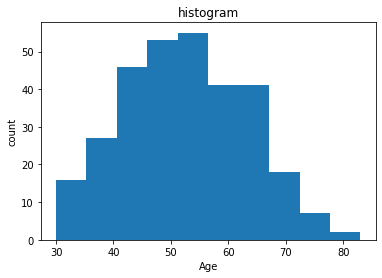

In [8]:
plt.hist(df["age"])
plt.xlabel('Age')
plt.ylabel('count')
plt.title('histogram')
plt.show()

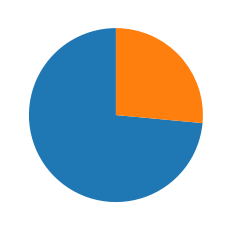

In [9]:
plt.pie(df["status"].value_counts(),startangle=90)
plt.show()

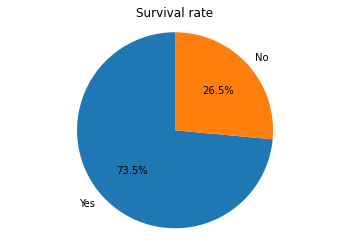

In [10]:
labels=["Yes","No"]
plt.pie(df["status"].value_counts(),labels=labels,autopct='%1.1f%%', startangle=90)
plt.title('Survival rate')
plt.axis('equal')
plt.show()

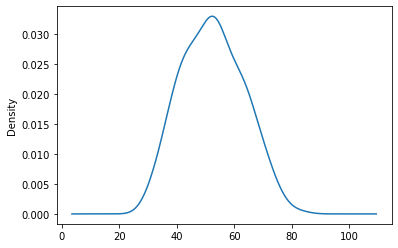

In [11]:
df["age"].plot(kind="density")

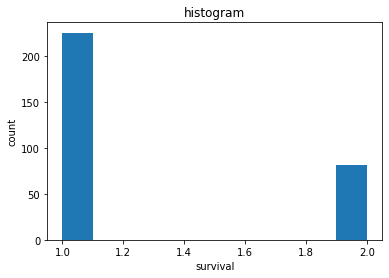

In [12]:
plt.hist(df["status"])
plt.xlabel('survival')
plt.ylabel('count')
plt.title('histogram')
plt.show()

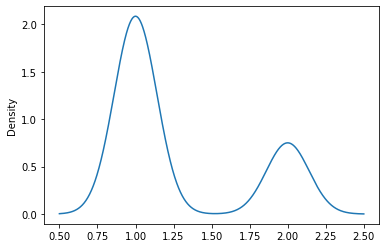

In [13]:
df["status"].plot(kind="density")

#### **Bi-Variate Analysis**
It is performed to find the relationship between each variable in the dataset and the target variable of interest (or) using 2 variables and finding the relationship between them. Ex:-Box plot, Violin plot.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


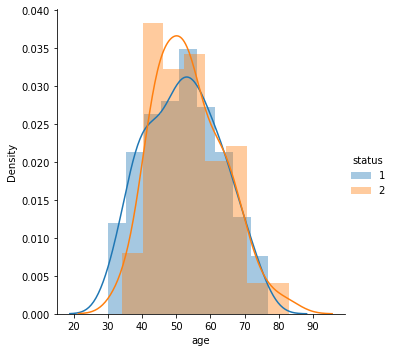

In [14]:
sns.FacetGrid(df,hue="status",height=5).map(sns.distplot,"age").add_legend()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


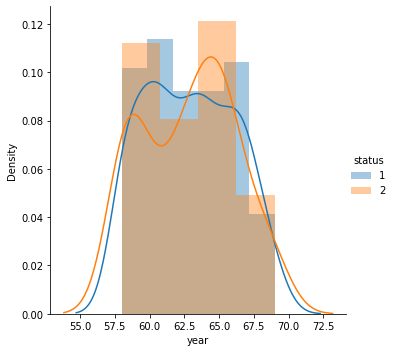

In [15]:
sns.FacetGrid(df,hue="status",height=5).map(sns.distplot,"year").add_legend()

pdf [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
binedges [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


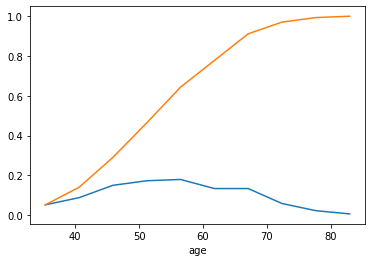

In [16]:
counts,bin_edges=np.histogram(df['age'],bins=10,density=True)
plt.xlabel('age')
pdf=counts/(sum(counts))
print("pdf",pdf)
print("binedges",bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

In [17]:
counts,bin_edges=np.histogram(df['age'],bins=10,density=False)
print("count",counts)
print("binedges",bin_edges)

count [16 27 46 53 55 41 41 18  7  2]
binedges [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


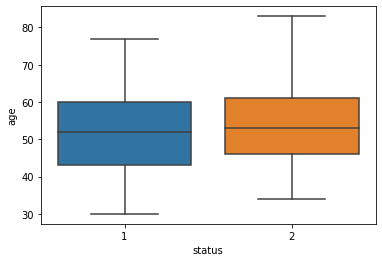

In [18]:
sns.boxplot(x='status',y='age',data=df)
plt.show()

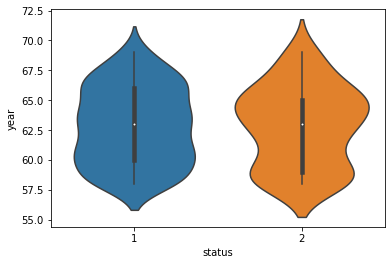

In [19]:
sns.violinplot(x="status",y="year",data=df)

#### **Multi-Variate Analysis**
It is performed to understand interactions between different fields in the dataset (or) finding interactions between variables more than 2. Ex:- Pair plot and 3D scatter plot.

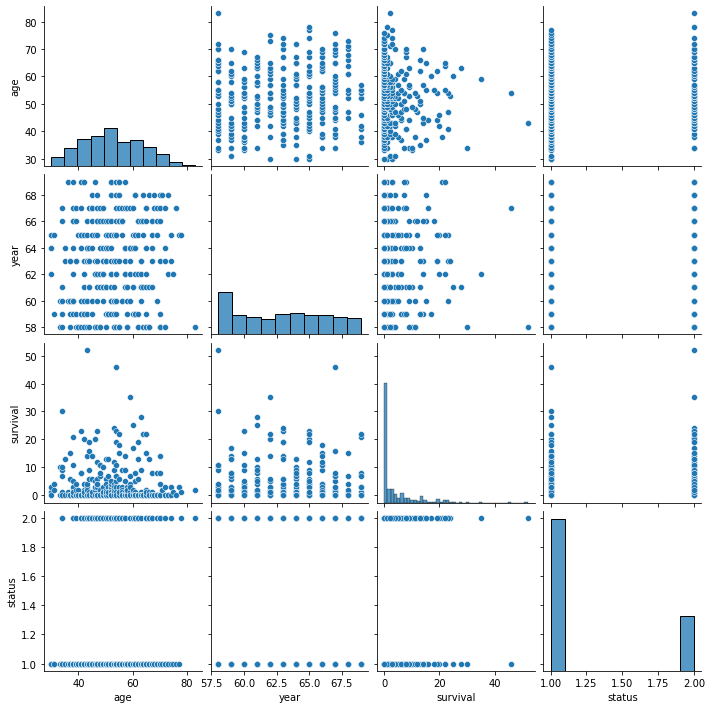

In [20]:
sns.pairplot(df)

###Correlation-matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

In [21]:
matrix = df.corr()
print(matrix)

               age      year  survival    status
age       1.000000  0.089529 -0.063176  0.067950
year      0.089529  1.000000 -0.003764 -0.004768
survival -0.063176 -0.003764  1.000000  0.286768
status    0.067950 -0.004768  0.286768  1.000000


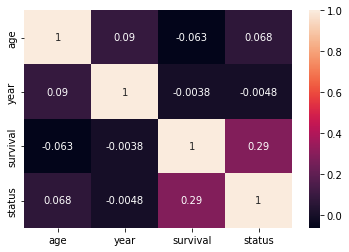

In [22]:
sns.heatmap(df.corr(),annot=True)